##  Data Driven Insight for Indian Startup Growth

        Business Understanding
The target is to identify the factors that contributing to the StartUp Growth in India 
        

    Hypotheses for Data-Driven Insight for Indian Startup Growth 
    
  Null Hypothesis (H0):
There is no significant difference in the growth rates among startups located in different sectors and regions within the Indian startup ecosystem.

  Alternative Hypothesis (H1):
There is a significant difference in the growth rates among startups located in different sectors and regions within the Indian startup.

Hypothesis aims to explore whether the growth rates of startups in India are influenced not only by their sector but also by their geographical location. By analyzing data on startup growth, sectors, and regional dynamics, we seek to identify patterns that can provide strategic insights for  investors.




In [231]:
# importing the necessary libraries
import os, sys
from sqlalchemy import create_engine
import pyodbc # Database Connectivity with  Open Database Connectivity (pyodbc)

from dotenv import dotenv_values # dotenv library to load environment variables
# Lib for data manipulation  analysis and Viz
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

    Load env Variable and assign Login Credentials 

In [232]:
# Load environment variables from .env file 

environment_variables=dotenv_values('.env')

# Get the values for the  login credentials from  the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")


    Test Credectiom Connection

In [233]:

connection = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


    connect to the server

In [234]:
# This will connect to the server with help of pyodbc.

con = pyodbc.connect(connection)

      Data Loading with login credections

In [235]:
# Load the dataset SQL query
query1 = "Select * from dbo.LP1_startup_funding2020"
query2 = "Select * from dbo.LP1_startup_funding2021"

In [236]:
# Read data from the  on dataset 
data_2018 = pd.read_csv('dataset\startup_funding2018.csv')
data_2019 = pd.read_csv('dataset\startup_funding2019.csv')
data_2020 = pd.read_sql(query1, con)
data_2021 = pd.read_sql(query2, con)


    Data Overview 

In [237]:
# 2018 dataset overview
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [238]:
data_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [239]:
# 2019 dataset overview
data_2019.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


In [240]:
# 2020 dataset overview
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [241]:
# 2021 dataset overview
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


        Data Cleaning for all datasets

Check Duplications each dataset

In [242]:
# Check Dulpications for 2018 data
data_2018.duplicated().sum()

1

In [243]:
data_2019.duplicated().sum()

0

In [244]:
data_2020.duplicated().sum()

3

In [245]:
data_2021.duplicated().sum()

19

View the Duplications

In [246]:
# View the Duplication base Compnay Name on 2018 data

duplicates = data_2018[data_2018.duplicated(subset=['Company Name'], keep=False)]
# View the Duplications data
duplicates

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [247]:
# View the Duplication base Company Name on 2020 data

duplicates = data_2020[data_2020.duplicated(subset=['Company_Brand'], keep=False)]
# View the Duplications data
duplicates

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
8,Rupeek,2015.0,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,None
15,Zomato,2008.0,Gurgaon,Food Delivery,Zomato is a food delivery and restaurant disco...,"Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah","Kora, Tiger Global Management",660000000.0,None,None
17,Shiprocket,2017.0,New Delhi,E-commerce,Shiprocket helps online retailers simplify the...,"Gautam Kapoor, Saahil Goel, Vishesh Khurana","Bertelsmann India Investments, InnoVen Capital",7500000.0,Series C,None
18,Pine Labs,1998.0,Noida,FinTech,A merchant platform company that provides fina...,Amrish Rau,"Mastercard, Temasek Holdings",NaN,None,None
25,CoinDCX,2017.0,Mumbai,FinTech,CoinDCX is a company that specializes in crypt...,"Neeraj Khandelwal, Sumit Gupta","Coinbase Ventures, Polychain",10000000.0,Series B,None
...,...,...,...,...,...,...,...,...,...,...
1035,Byju,2011.0,None,Edtech,Provides online learning classes,Byju Raveendran,Tiger Global,200000000.0,None,None
1039,Rivigo,2014.0,Gurugram,Logistics,It offers delivery services across India to re...,"Deepak Garg, Gazal Kalra",Trifecta Capital,3400000.0,Series F,None
1040,BuildPan,2019.0,Indore,SaaS,"It helps developers to test, integrate and dep...","Sonal Khandelwal, Vaibhav Tiwari","HNIs in India, Japan, and the US",NaN,Seed Round,None
1048,GoMechanic,2016.0,Delhi,Automobile Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...","Chiratae Ventures, Sequoia Capital, Orios Vent...",14700000.0,Series B,None


In [248]:
# View the Duplication base Compnay Name on 2021 data

duplicates = data_2021[data_2021.duplicated(subset=['Company_Brand'], keep=False)]
# View the Duplications data
duplicates

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None
...,...,...,...,...,...,...,...,...,...
1193,Sapio Analytics,2019.0,Mumbai,Computer Software,Sapio helps government create policies driven ...,"Hardik Somani, Ashwin Srivastava, Shripal Jain...","Rachit Poddar, Rajesh Gupta",$Undisclosed,None
1195,Delhivery,2011.0,Gurugram,Logistics & Supply Chain,Delhivery is a leading logistics and supply ch...,Sahil Barua,Addition,$76000000,Series I
1198,GoKwik,2020.0,New Delhi,Information Technology & Services,GoKwik is a platform for solving shopping expe...,"Ankush Talwar, Chirag Taneja, Vivek Bajpai","Matrix Partners India, Jitendra Gupta, RTP Global",$5000000,Pre-series A
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C


 Dropping data duplicate

In [249]:
# Drop 2018 data duplicates
data_2018 = data_2018.drop_duplicates()

In [250]:
# Drop 2019 data duplicates
data_2019 = data_2019.drop_duplicates()

In [251]:
# Drop 2020 data duplicates
data_2020 = data_2020.drop_duplicates()

In [252]:
# Drop 2021 data duplicate
data_2021 = data_2021.drop_duplicates()

Check Dulpication after cleaning


In [253]:
# Check Dulpications for 2018 data
data_2018.duplicated().sum()

0

In [254]:
# Check Dulpications for 2019 data
data_2019.duplicated().sum()

0

In [255]:
# Check Dulpications for 2020 data
data_2020.duplicated().sum()

0

In [256]:
# Check Dulpications for 2021 data
data_2021.duplicated().sum()

0

Checking Missing Values

In [257]:
#check for missing data for 2018
missing_values_2018 = data_2018.isnull().sum
missing_values_2018()



Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [258]:
#check for missing data for 2019
missing_values_2019 = data_2019.isnull().sum
missing_values_2019()


Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [259]:
#check for missing data for 2020
missing_values_2020 = data_2020.isnull().sum
missing_values_2020()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            253
Stage             462
column10         1050
dtype: int64

In [260]:
#check for missing data for 2021
missing_values_2021 = data_2021.isnull().sum
missing_values_2021()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          61
Amount             3
Stage            421
dtype: int64

Add Year column to all datasets

In [261]:
# Adding a new "Year" column with the value of its value to all rows
data_2018['Year'] = 2018
data_2019['Year'] = 2019
data_2020['Year'] = 2020
data_2021['Year'] = 2021

 Rename columns in 2018 and 2019 datasets

In [262]:
data_2018.rename(columns={'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','About Company':'What it does'} ,inplace=True)
data_2019.rename(columns={'Company/Brand':'Company_Brand','Amount($)':'Amount'},inplace=True)



 columns section for data analysis

In [263]:
# Select the specified columns for analysis
data_2018_selected = data_2018[['Company_Brand','HeadQuarter','Sector','Amount','Stage', 'Year']]
data_2019_selected = data_2019[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year']]
data_2020_selected = data_2020[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year']]
data_2021_selected = data_2021[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year']]




 Combine all datasets into one dataframe combinedData

In [264]:
# concatinate the tables
combinedData= pd.concat([data_2018_selected,data_2019_selected,data_2020_selected,data_2021_selected],ignore_index=True)

In [265]:
combinedData.tail(10)

,Company_Brand,HeadQuarter,Sector,Amount,Stage,Year
2846,Proeon,Pune,Food Production,$2000000,Seed,2021
2847,InfyU Labs,Gandhinagar,AgriTech,$200000,Seed,2021
2848,TechEagle,Gurugram,Aviation & Aerospace,$500000,Seed,2021
2849,Voxelgrids,Bangalore,Deeptech,$5000000,None,2021
2850,Cogos Technologies,Bangalore,Logistics & Supply Chain,$2000000,Pre-series A,2021
2851,Gigforce,Gurugram,Staffing & Recruiting,$3000000,Pre-series A,2021
2852,Vahdam,New Delhi,Food & Beverages,$20000000,Series D,2021
2853,Leap Finance,Bangalore,Financial Services,$55000000,Series C,2021
2854,CollegeDekho,Gurugram,EdTech,$26000000,Series B,2021
2855,WeRize,Bangalore,Financial Services,$8000000,Series A,2021


Check Amount Columns

In [266]:
combinedData['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [267]:
# Replace  non-numerical values in the 'amount' column with 0
combinedData['Amount'].replace(['—','Undisclosed','None', '$Undisclosed', '$','Upsparks', 'JITO Angel Network, LetsVenture','Series C', 'Seed', '$undisclosed', 'ah! Ventures', 'Pre-series A', 'ITO Angel Network, LetsVenture'], 0, inplace=True)

In [268]:
combinedData['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', 0, '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60,0

To check for the null Values in the Concataned table

In [269]:
combinedData.isna().sum()

Company_Brand      0
HeadQuarter      114
Sector            18
Amount           256
Stage            929
Year               0
dtype: int64

 handling the missing Values

In [270]:
combinedData.fillna(value={'HeadQuarter':'Unknown','Sector':'Unknown','Amount':0,'Stage':'Unknown'},inplace=True)


In [271]:
combinedData.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Amount           0
Stage            0
Year             0
dtype: int64

To convert the Amount Column to one currency

In [272]:
combinedData.head(100)

,Company_Brand,HeadQuarter,Sector,Amount,Stage,Year
0,TheCollegeFever,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",250000,Seed,2018
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming","₹40,000,000",Seed,2018
2,MyLoanCare,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace","₹65,000,000",Series A,2018
3,PayMe India,"Noida, Uttar Pradesh, India","Financial Services, FinTech",2000000,Angel,2018
4,Eunimart,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",0,Seed,2018
...,...,...,...,...,...,...
95,AuthMetrik,"Gurgaon, Haryana, India","B2B, Biometrics, Cyber Security, Fraud Detecti...","$10,000",Grant,2018
96,Khidki,"Bangalore, Karnataka, India","Artificial Intelligence, Social",0,Seed,2018
97,LetsTransport,"Bangalore, Karnataka, India","Logistics, Transportation, Travel","₹1,000,000,000",Series B,2018
98,Next Digital Solutions,"Kota, Rajasthan, India","Digital Marketing, SEM, SEO, Web Development","₹100,000",Angel,2018


In [273]:
# A function to convert amount to $
def convert_to_usd(amount):
    exchange_rate = 70  # Exchange rate: 1 USD = 70 INR

    # Check if the amount is numeric
    if str(amount).replace(',', '').replace('.', '').isdigit():
        return round(float(amount), 2)
    elif '₹' in str(amount):  # Check if the amount is in INR
        inr_amount = float(str(amount).replace('₹', '').replace(',', ''))  # Remove currency symbol and commas
        round(inr_amount / exchange_rate, 2)
    else:
        return round(float(str(amount).replace('$', '').replace(',', '')), 2)

# Apply the conversion function to the 'Amount' column
combinedData['Amount'] = combinedData['Amount'].apply(convert_to_usd)

In [274]:
combinedData.head()

,Company_Brand,HeadQuarter,Sector,Amount,Stage,Year
0,TheCollegeFever,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",250000.0,Seed,2018
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming",NaN,Seed,2018
2,MyLoanCare,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",NaN,Series A,2018
3,PayMe India,"Noida, Uttar Pradesh, India","Financial Services, FinTech",2000000.0,Angel,2018
4,Eunimart,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",0.0,Seed,2018


To Rename the Amount Column to show currency

In [275]:
combinedData.rename(columns={'Amount':'Amount($)'}, inplace=True)
combinedData.head()

,Company_Brand,HeadQuarter,Sector,Amount($),Stage,Year
0,TheCollegeFever,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",250000.0,Seed,2018
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming",NaN,Seed,2018
2,MyLoanCare,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",NaN,Series A,2018
3,PayMe India,"Noida, Uttar Pradesh, India","Financial Services, FinTech",2000000.0,Angel,2018
4,Eunimart,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",0.0,Seed,2018


handle nan values by imputing by 0

In [276]:
combinedData.isna().sum()

Company_Brand      0
HeadQuarter        0
Sector             0
Amount($)        144
Stage              0
Year               0
dtype: int64

In [277]:
# Handle missing values
combinedData.fillna(0, inplace=True)


Exploratory Data Analysis (EDA)

Visualize Data

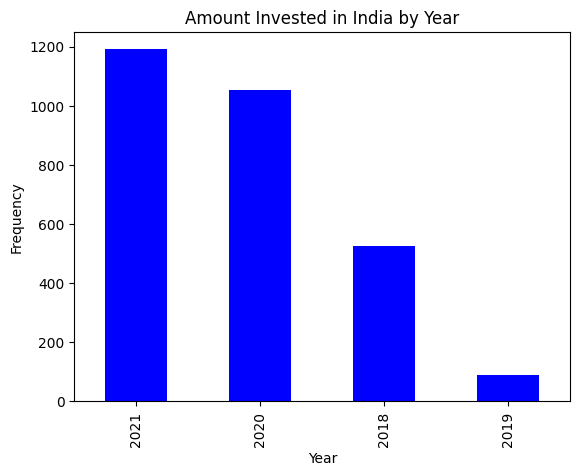

In [278]:
#  the Amount invested by

Amount_ivested_by_year =(combinedData['Year'].value_counts())

Amount_ivested_by_year.plot(kind='bar',color='Blue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Amount Invested in India by Year')
plt.show();

Categorize the stage

In [279]:
# fucntion to categorize the stage
def categorize_funding_stage(stage):
    seed_stages = ['Seed', 'Pre-Seed', 'Seed funding', 'Seed fund', 'Seed round', 'Seed A', 'Seed Round & Series A', 'Seed Investment', 'Early seed', 'Pre seed round', 'Pre seed Round']
    early_stages = ['Angel', 'Angel Round', 'Pre series A', 'Pre-series A', 'Pre-series A1', 'Pre Series A', 'Pre series A1', 'Pre-series A1', 'Pre- series A', 'Pre-series', 'Pre- Series B', 'Pre-series B', 'Pre series B', 'Pre-series C', 'Pre-Series B']
    series_a_stages = ['Series A', 'Series A-1', 'Series A+', 'Seies A', 'Series A1', 'Series A2']
    series_b_stages = ['Series B', 'Series B+', 'Series B2', 'Series B3']
    later_stages = ['Series C', 'Series D', 'Series D1', 'Series E', 'Series E2', 'Series F', 'Series F1', 'Series F2', 'Series G', 'Series H', 'Series I']
    other_stages = ['Series Unknown', 'Corporate Round', 'Funding Round', 'Mid series', 'Bridge', 'Bridge Round', 'Post series A', 'Post-IPO Debt', 'Post-IPO Equity', 'Secondary Market', 'Non-equity Assistance', 'Debt Financing', 'Debt', 'Fresh funding', 'Grant', 'Undisclosed']
    unknown_stages = ['Unknown', '$1200000', '$300000', '$6000000', '$1000000']

    if stage in seed_stages:
        return 'Seed Stage'
    elif stage in early_stages:
        return 'Early Stage'
    elif stage in series_a_stages:
        return 'Series A Stage'
    elif stage in series_b_stages:
        return 'Series B Stage'
    elif stage in later_stages:
        return 'Later Stage'
    elif stage in other_stages:
        return 'Other Funding Round'
    elif stage in unknown_stages:
        return 'Unknown Stage'
    else:
        return 'Uncategorized'

# Apply the function to the 'Stage' column
combinedData['Stage'] = combinedData['Stage'].apply(categorize_funding_stage)



In [280]:
combinedData['Stage'].unique()

array(['Seed Stage', 'Series A Stage', 'Early Stage', 'Series B Stage',
       'Uncategorized', 'Other Funding Round', 'Later Stage',
       'Unknown Stage'], dtype=object)

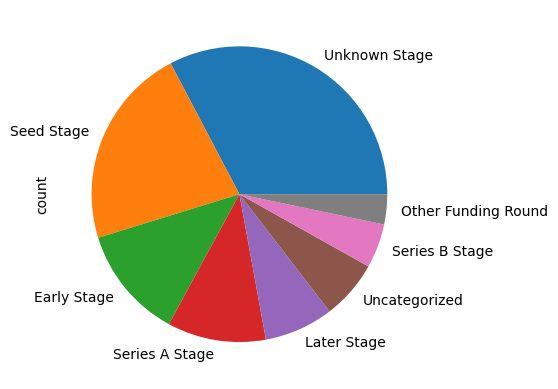

In [281]:
# To check the different Stages

Stages= combinedData['Stage'].value_counts()
Stages.plot(kind='pie')
plt.show();

Categorize the sectors

In [282]:

# Function to categorize sectors
def categorize_sector(sector):
    # Mapping of sectors to categories
    sector_categories = {
        'Marketing': ['Brand Marketing', 'Event Promotion', 'Marketing', 'Sponsorship', 'Ticketing'],
        'Agriculture': ['Agriculture', 'Farming'],
        'Technology': ['E-Commerce', 'Internet', 'Apps', 'SaaS', 'Information Technology', 'Blockchain', 'Developer Tools'],
        'Healthcare': ['Health Care', 'Medical', 'Biotechnology', 'Pharmaceutical'],
        'Automotive': ['Automotive', 'Electric Vehicle', 'Autonomous Vehicles'],
        'Logistics': ['Logistics', 'Supply Chain Management', 'Transportation'],
        'Education': ['EdTech', 'Education', 'E-Learning', 'Higher Education'],
        'Food and Beverage': ['Food and Beverage', 'Food Delivery', 'Food Processing'],
        'Energy': ['Renewable Energy', 'Clean Energy', 'Solar', 'Energy Storage'],
        'Fashion': ['Fashion', 'Lifestyle'],
        'Real Estate': ['Real Estate'],
        'Finance': ['Finance', 'Financial Services', 'FinTech', 'Venture Capital', 'Payments', 'Wealth Management', 'Credit', 'Financial Services', 'Lending', 'Marketplace', 'Insurance', 'Payments'],
        'Media and Entertainment': ['Media and Entertainment', 'Broadcasting', 'Music', 'Video Streaming'],
        
    }

    # Iterate through categories and check if the sector belongs to any category
    for category, keywords in sector_categories.items():
        if any(keyword.lower() in sector.lower() for keyword in keywords):
            return category

    # If no category is matched, return 'Other'
    # return 'Other Category'

# Apply the function to the 'Sector' column
combinedData['Sector'] = combinedData['Sector'].apply(categorize_sector)


In [283]:
combinedData['Sector'].unique()

array(['Marketing', 'Agriculture', 'Finance', 'Technology', None,
       'Food and Beverage', 'Automotive', 'Logistics', 'Education',
       'Energy', 'Healthcare', 'Media and Entertainment', 'Fashion',
       'Real Estate'], dtype=object)

Top Sectors that received the funds

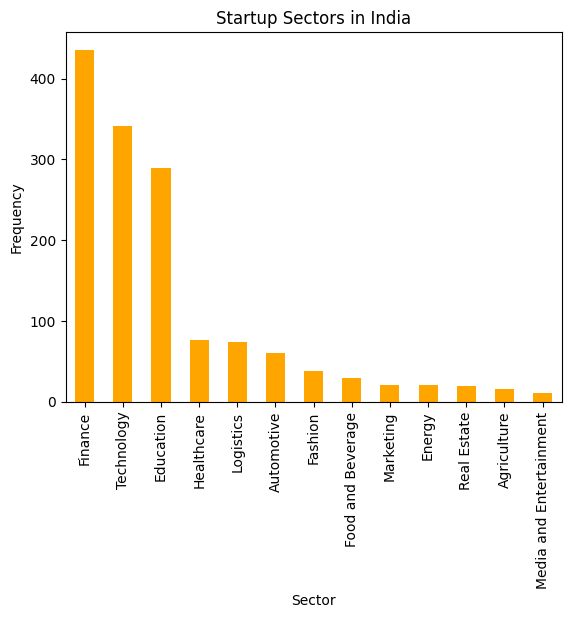

In [284]:
# To check the top sectors 

sectors =(combinedData['Sector'].value_counts())

sectors.plot(kind='bar',color='orange')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.title('Startup Sectors in India')
plt.show();